In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Binar-Data-Science/data.csv", encoding='latin-1')

In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0


In [ ]:
df.shape

(13169, 13)

In [ ]:
df.duplicated().sum()

125

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,False,False,False,False,False,False,False,False,False,False,False,False,False
13165,False,False,False,False,False,False,False,False,False,False,False,False,False
13166,False,False,False,False,False,False,False,False,False,False,False,False,False
13167,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()/df.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower().strip()))
print(df)

                                                   Tweet  HS  Abusive  \
0       disaat semua cowok berusaha melacak perhatian...   1        1   
1      rt user user siapa yang telat ngasih tau elued...   0        1   
2      41 kadang aku berfikir kenapa aku tetap percay...   0        0   
3      user user aku itu akunnku tau matamu sipit tap...   0        0   
4      user user kaum cebong kapir udah keliatan dong...   1        1   
...                                                  ...  ..      ...   
13164  user jangan asal ngomong ndasmu congor lu yg s...   1        1   
13165                        user kasur mana enak kunyuk   0        1   
13166  user hati hati bisu  gnnlagi bosan huft xf0x9f...   0        0   
13167  user user user user bom yang real mudah terdet...   0        0   
13168  user mana situ ngasih itu cuma foto ya kutil onta   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0                  1         0            0

In [ ]:
stop_words = set(stopwords.words('indonesian'))
stop_words -= {'mau', 'maka', 'akan', 'yang', 'untuk', 'dan', 'juga', 'dari', 'di', 'kan'}


def remove_stopwords(teks):
    words = teks.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(filtered_words)

df['Tweet'] = df['Tweet'].apply(remove_stopwords)
print(df['Tweet'])

0        disaat cowok berusaha melacak perhatian gue lo...
1        rt user user yang telat ngasih tau eluedan sar...
2        kadang berfikir percaya tuhan jatuh berkalikal...
3           user user akunnku tau matamu sipit diliat dari
4        user user kaum cebong kapir udah keliatan dong...
                               ...                        
13164              user ngomong ndasmu congor lu yg anjyng
13165                               user kasur enak kunyuk
13166               user hati hati bisu gnnlagi bosan huft
13167    user user user user bom yang real mudah terdet...
13168                  user situ ngasih foto ya kutil onta
Name: Tweet, Length: 13044, dtype: object


In [ ]:
stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['Tweet'] = df['Tweet'].apply(stem_text)

print(df['Tweet'])

In [ ]:
nltk.download('punkt')

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

df['Tweet'] = df['Tweet'].apply(tokenize)

# Menampilkan hasil tokenisasi
print(df['Tweet'])

In [ ]:
import string

def remove_punctuation(text):
    # mengubah daftar kata menjadi string tunggal
    text = ' '.join(text)
    # membuat translation table yang berisi mapping untuk menghapus punctuation
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['Tweet'] = df['Tweet'].apply(remove_punctuation)

print(df['Tweet'])

0        disaat cowok berusaha melacak perhatian gue lo...
1        rt user user yang telat ngasih tau eluedan sar...
2        kadang berfikir percaya tuhan jatuh berkalikal...
3           user user akunnku tau matamu sipit diliat dari
4        user user kaum cebong kapir udah keliatan dong...
                               ...                        
13164              user ngomong ndasmu congor lu yg anjyng
13165                               user kasur enak kunyuk
13166               user hati hati bisu gnnlagi bosan huft
13167    user user user user bom yang real mudah terdet...
13168                  user situ ngasih foto ya kutil onta
Name: Tweet, Length: 13044, dtype: object


In [ ]:
# membaca teks dari file
with open('/content/drive/MyDrive/Binar-Data-Science/data.csv', 'r', encoding="Latin-1") as file:
    teks = file.read()

# membaca daftar akronim dari file
with open('/content/drive/MyDrive/Binar-Data-Science/new_kamusalay.csv', 'r', encoding='Latin-1') as file:
    lines = file.readlines()

# menghapus karakter newline pada setiap akronim
daftar_akronim = [akronim.strip() for akronim in lines]

# mengganti setiap akronim dengan definisinya
daftar_akronim_dict = {}
for line in lines:
    parts = line.strip().split(',')
    if len(parts) == 2:
        daftar_akronim_dict[parts[0]] = parts[1]

for akronim in daftar_akronim_dict:
    teks = teks.replace(akronim, daftar_akronim_dict[akronim])

In [ ]:
new_df = df.loc[df['HS_Individual'] == 1, ['Tweet', 'HS_Individual']]
print(new_df)

In [ ]:
new_df['total_char'] = new_df['Tweet'].apply(len)
new_df['total_word'] = new_df['Tweet'].apply(lambda sent: len(sent.split()))
print(new_df)

                                                   Tweet  HS_Individual  \
0      disaat cowok berusaha melacak perhatian gue lo...              1   
10             gw jari lu sebelom gw ukur nyali bacot lu              1   
11     user user user user banci kaleng malu ga dari ...              1   
13     aktor huruhara prabowo s lengserkan pemerintah...              1   
14     user bu guru enakan jablay guru esd sihnkayakn...              1   
...                                                  ...            ...   
13155  user user makannya w suruh baca apbn biar ga b...              1   
13157  user recepanda salah gubernur pakkkkbukan pres...              1   
13161     brengsek orang terbuat dr bikin gue kasar mulu              1   
13164            user ngomong ndasmu congor lu yg anjyng              1   
13168                user situ ngasih foto ya kutil onta              1   

       total_char  total_word  
0             116          19  
10             41           9  
11 

In [ ]:
new_df.mean()

<ipython-input-21-b697eb9e3f41>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.mean()


HS_Individual     1.000000
total_char       72.047740
total_word       12.024576
dtype: float64

In [ ]:
new_df.median()

<ipython-input-22-31c5cad10509>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.median()


HS_Individual     1.0
total_char       65.0
total_word       11.0
dtype: float64

In [ ]:
new_df['total_char'].mode()

0    23
Name: total_char, dtype: int64

In [ ]:
new_df['total_word'].mode()

0    6
Name: total_word, dtype: int64

In [ ]:
range_total_word = new_df.total_word.max() - new_df.total_word.min() 
range_total_word

48

In [ ]:
range_total_char = new_df.total_char.max() - new_df.total_char.min()
range_total_char

226

In [ ]:
p0 = new_df.total_char.min()
p100 = new_df.total_char.max()

In [ ]:
q1 = new_df.total_char.quantile(0.25)
q2 = new_df.total_char.quantile(0.5)
q3 = new_df.total_char.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

print("Batas Bawah 'total char' : ", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0 :
  print("Tidak ada outlier dari sisi batas bawah")
else :
  print("Ada outlier dari sisi batas bawah")

print()
print("Batas Atas 'total_char' : ", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100 :
  print("Tidak ada outlier dari sisi batas atas")
else :
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total char' :  -45.0
Nilai minimum 3
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char' :  179.0
Nilai maksimum 229
Ada outlier dari sis batas atas


In [ ]:
new_df.var()

<ipython-input-29-f5c89e21818c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.var()


HS_Individual       0.000000
total_char       1786.884694
total_word         48.806121
dtype: float64

In [ ]:
new_df.std()

<ipython-input-30-cfb8197f1c59>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.std()


HS_Individual     0.000000
total_char       42.271559
total_word        6.986138
dtype: float64

In [ ]:
new_df.skew()

<ipython-input-31-f338552b01d2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.skew()


HS_Individual    0.000000
total_char       0.977546
total_word       1.152589
dtype: float64

In [ ]:
new_df.kurtosis()

<ipython-input-32-f6e4455ab8b4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.kurtosis()


HS_Individual    0.000000
total_char       0.753535
total_word       1.430769
dtype: float64

<Axes: >

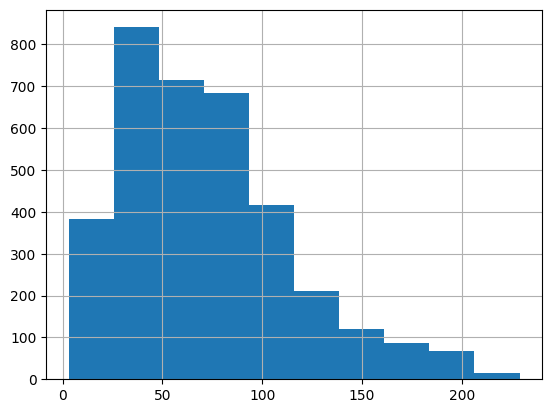

In [ ]:
new_df.total_char.hist()

<Axes: >

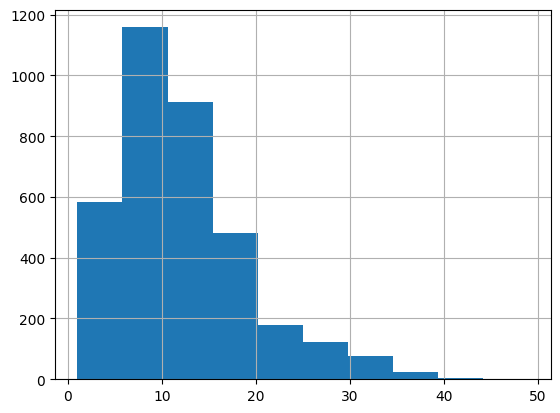

In [ ]:
new_df.total_word.hist()

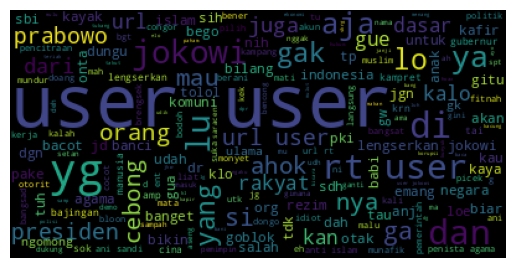

In [ ]:
from wordcloud import WordCloud

text = ' '.join(new_df['Tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
new_df.corr()

,HS_Individual,total_char,total_word
HS_Individual,NaN,NaN,NaN
total_char,NaN,1.000000,0.961278
total_word,NaN,0.961278,1.000000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='total_word', ylabel='total_char'>

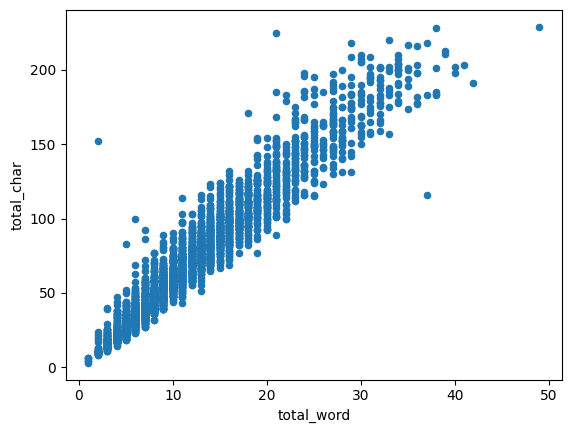

In [ ]:
new_df.plot(x='total_word', y='total_char', kind='scatter')

<Axes: xlabel='Tweet'>

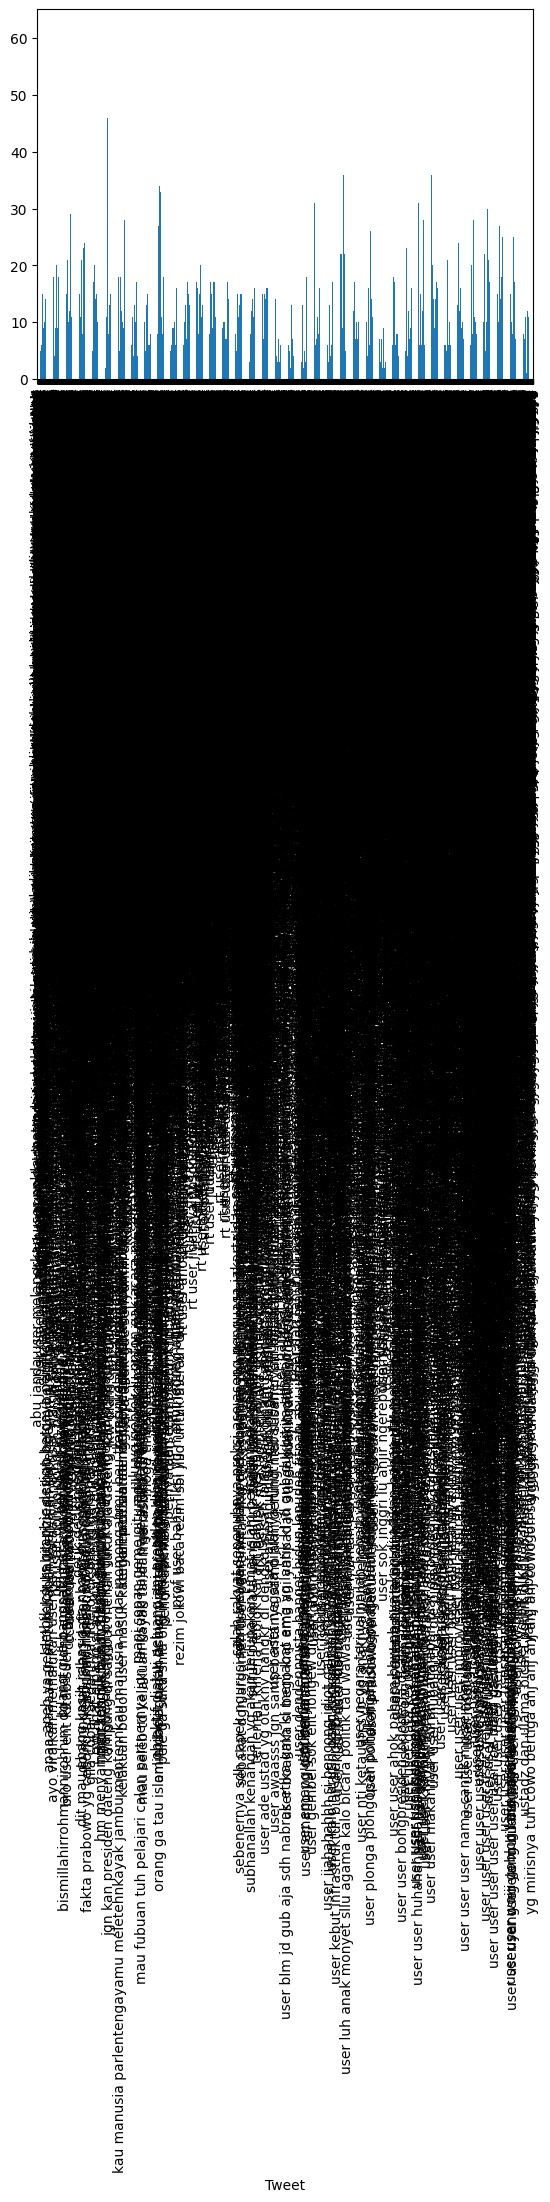

In [ ]:
new_df.groupby('Tweet').total_word.sum().plot(kind="bar")

<Axes: ylabel='Tweet'>

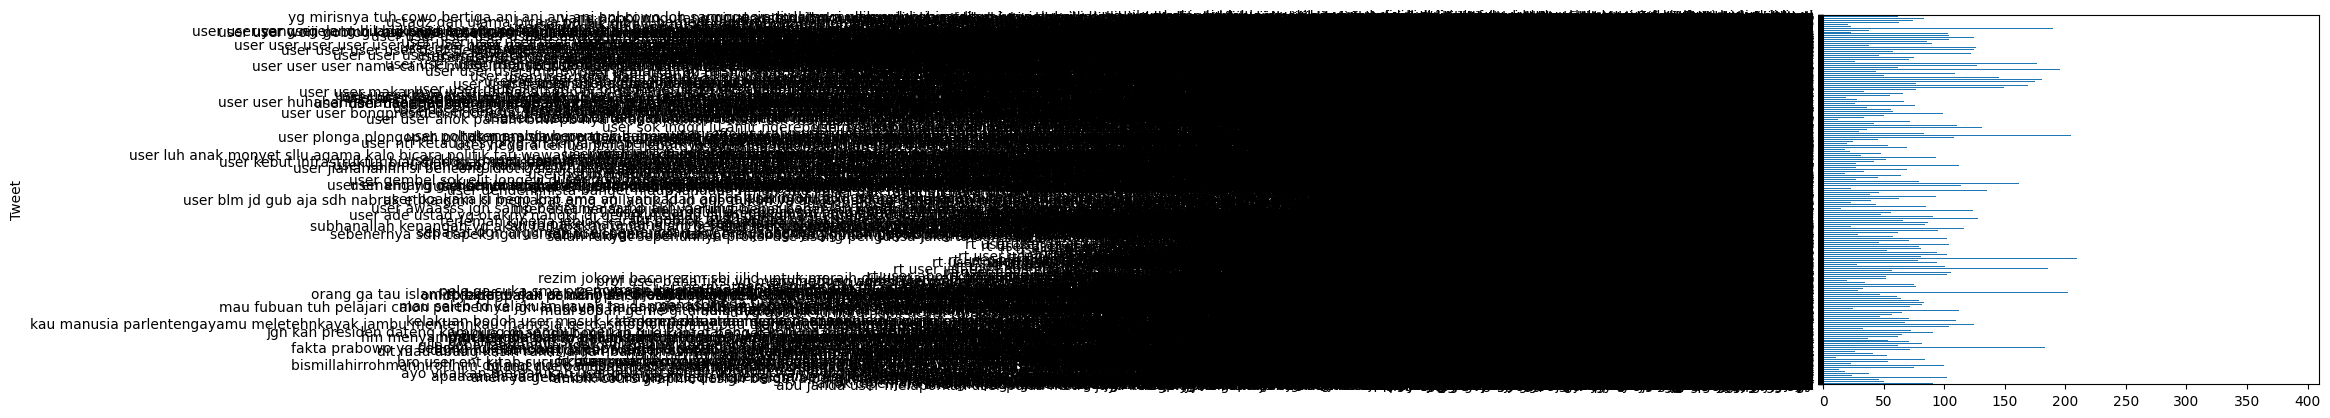

In [ ]:
new_df.groupby('Tweet').total_char.sum().plot(kind='barh')